In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir(r'C:\Users\Aaron Cherian\Documents\Python Scripts')

In [3]:
data_train = pd.read_csv('train.csv')
data_train.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc,av1,av2,av3,av4,sd1,sd2,sd3,sd4
0,1,1,1400.60,554.36,47.47,521.66,191,0,1400.600000,554.360000,47.470,521.660,0.000000,0.000000,0.000000,0.000000
1,1,2,1403.14,553.75,47.49,522.28,190,0,1401.870000,554.055000,47.480,521.970,1.796051,0.431335,0.014142,0.438406
2,1,3,1404.20,554.26,47.27,522.42,189,0,1402.646667,554.123333,47.410,522.120,1.850009,0.327159,0.121655,0.404475
3,1,4,1401.87,554.45,47.13,522.86,188,0,1402.452500,554.205000,47.340,522.305,1.559645,0.313103,0.171659,0.495950
4,1,5,1406.22,554.00,47.28,522.19,187,0,1403.206000,554.164000,47.328,522.282,2.159440,0.286234,0.151063,0.432574


In [4]:
X_train = data_train.drop(['id', 'cycle', 'ttf', 'label_bnc', 'av1', 'av2', 'av3', 'av4', 'sd1', 'sd2', 'sd3', 'sd4'],axis=1).values
y_train = data_train['label_bnc'].values
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [5]:
data_test = pd.read_csv('test.csv')
data_test.head()

,id,cycle,s1,s2,s3,s4,av1,av2,av3,av4,sd1,sd2,sd3,sd4,ttf,label_bnc
0,1,31,1398.91,554.42,47.23,521.79,1398.91,554.42,47.23,521.79,0.0,0.0,0.0,0.0,112,0
1,2,49,1410.83,553.52,47.67,521.74,1410.83,553.52,47.67,521.74,0.0,0.0,0.0,0.0,98,0
2,3,126,1418.89,552.59,47.88,520.83,1418.89,552.59,47.88,520.83,0.0,0.0,0.0,0.0,69,0
3,4,106,1406.88,552.64,47.65,521.88,1406.88,552.64,47.65,521.88,0.0,0.0,0.0,0.0,82,0
4,5,98,1419.36,553.29,47.46,521.00,1419.36,553.29,47.46,521.00,0.0,0.0,0.0,0.0,91,0


In [6]:
X_test = data_test.drop(['id', 'cycle', 'ttf', 'label_bnc', 'av1', 'av2', 'av3', 'av4', 'sd1', 'sd2', 'sd3', 'sd4'],axis=1).values
y_test = data_test['label_bnc'].values
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.87


In [9]:
from sklearn.metrics import recall_score
rec_knn = recall_score(y_test, y_pred_knn)
rec_knn

0.56

In [10]:
from sklearn.naive_bayes import MultinomialNB
model_name = 'Naive Byes Classifier'
nb_model = MultinomialNB(alpha = 0.1, class_prior = None, fit_prior = True)
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))

Accuracy: 0.75


In [12]:
from sklearn.metrics import recall_score
rec_nb = recall_score(y_test, y_pred_nb)
rec_nb

0.0

In [13]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state = 0, multi_class = 'auto', max_iter = 100)
lrc.fit(X_train,y_train)
y_pred_lrc = lrc.predict(X_test)
y_pred_lrc

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [14]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lrc))

Accuracy: 0.89


In [15]:
from sklearn.metrics import recall_score
rec_lrc = recall_score(y_test, y_pred_lrc)
rec_lrc

0.68

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.87


In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma='auto')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [19]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))

Accuracy: 0.89


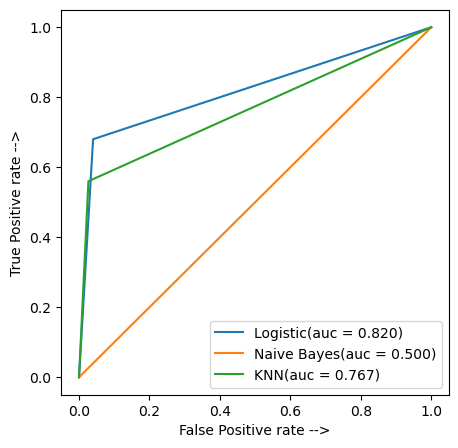

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lrc)
auc_logistic = auc(logistic_fpr, logistic_tpr)

nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5,5), dpi = 100)
plt.plot(logistic_fpr, logistic_tpr, linestyle = '-', label ='Logistic(auc = %0.3f)' % auc_logistic)
plt.plot(nb_fpr, nb_tpr, linestyle = '-', label ='Naive Bayes(auc = %0.3f)' % auc_nb)
plt.plot(knn_fpr, knn_tpr, linestyle = '-', label ='KNN(auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

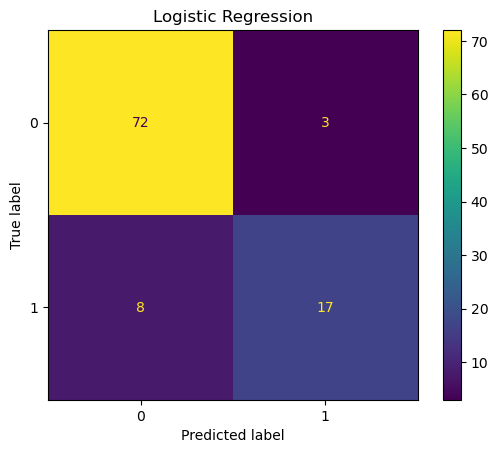

In [26]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plot_confusion_matrix(lrc, X_test, y_test)
plt.title('Logistic Regression')

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Naive Bayes Classification')

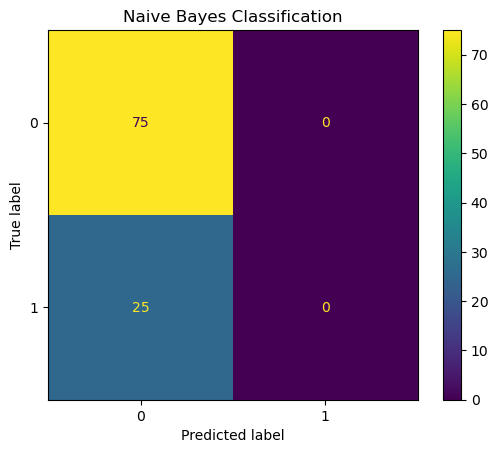

In [28]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plot_confusion_matrix(nb_model, X_test, y_test)
plt.title('Naive Bayes Classification')

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 1.0, 'KNN Classification')

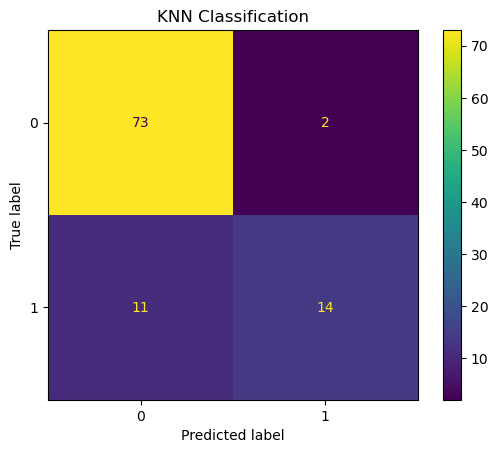

In [29]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plot_confusion_matrix(knn, X_test, y_test)
plt.title('KNN Classification')